### Importaci√≥n de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna para identificar la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los DataFrames
datos_completos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Mostrar las primeras filas para verificar
datos_completos.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  Tienda 1  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  Tienda 1  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  Tienda 1  
3               Nequi                   1   3.43722 -76.52250  Tienda 1  
4               Nequi                   1   6.25184 -75.56359  Tienda 1

#1. An√°lisis de facturaci√≥n



In [4]:
# Ingreso total por cada tienda
"""
En este primer an√°lisis, debes calcular el ingreso total de cada tienda.
Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
"""
# Configuraci√≥n de formato
pd.options.display.float_format = '{:,.0f}'.format

# Calcular el total de facturaci√≥n para cada tienda

ingreso_tienda1= tienda1["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Organizo los ingresos de cada tienda en un DataFrame
ingresos = {
            'Tienda': ['Tienda1', 'Tienda2', 'Tienda3','Tienda4'],
            'Ingreso':[tienda1['Precio'].sum(),
                       tienda2['Precio'].sum(),
                       tienda3['Precio'].sum(),
                       tienda4['Precio'].sum()
                      ]
            }

df_ingresos = pd.DataFrame(ingresos)
df_ingresos


Tienda       Ingreso
0  Tienda1 1,150,880,400
1  Tienda2 1,116,343,500
2  Tienda3 1,098,019,600
3  Tienda4 1,038,375,700

## Gr√°fico

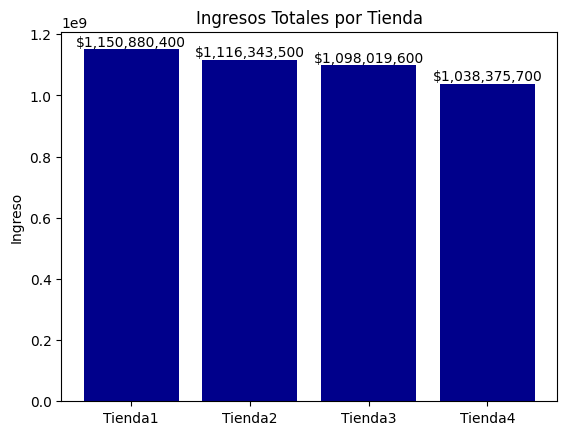

In [5]:
plt.figure()
barras = plt.bar(ingresos['Tienda'], ingresos['Ingreso'], color = 'darkblue')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingreso')

# Agregar etiquetas con los valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    texto = f"${altura:,.0f}"  # separador de miles y sin decimales
    plt.text(barra.get_x() + barra.get_width()/2, altura + 1, texto,
             ha='center', va='bottom')

plt.show()

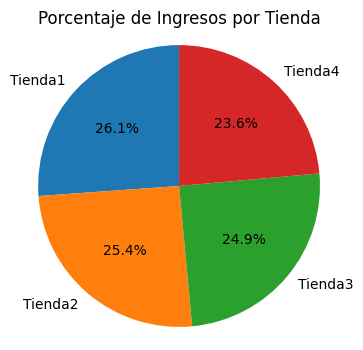

In [6]:
plt.figure(figsize=(4,4))
plt.pie(ingresos['Ingreso'], labels=ingresos['Tienda'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Ingresos por Tienda')
plt.axis("equal")  # Para que sea un c√≠rculo perfecto
plt.show()

# 2. Ventas por categor√≠a

In [7]:
ventas_categoria = datos_completos.pivot_table(
    index="Categor√≠a del Producto",
    columns="Tienda",
    values="Precio",
    aggfunc="count"
)

# Ordenar por total de ventas en todas las tiendas
ventas_categoria["Total"] = ventas_categoria.sum(axis=1) # Calcular el total por categor√≠a (fila)
ventas_categoria = ventas_categoria.sort_values(by="Total", ascending=True) # Ordeno de menor a mayor por la columna Total
ventas_categoria = ventas_categoria.drop(columns="Total")   # quita la columna llamada "Total".

ventas_categoria.head(10)

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categor√≠a del Producto                                         
Art√≠culos para el hogar       171       181       177       201
Libros                        173       197       185       187
Instrumentos musicales        182       224       177       170
Deportes y diversi√≥n          284       275       277       277
Electrodom√©sticos             312       305       278       254
Juguetes                      324       313       315       338
Electr√≥nicos                  448       422       451       451
Muebles                       465       442       499       480

## Gr√°fico

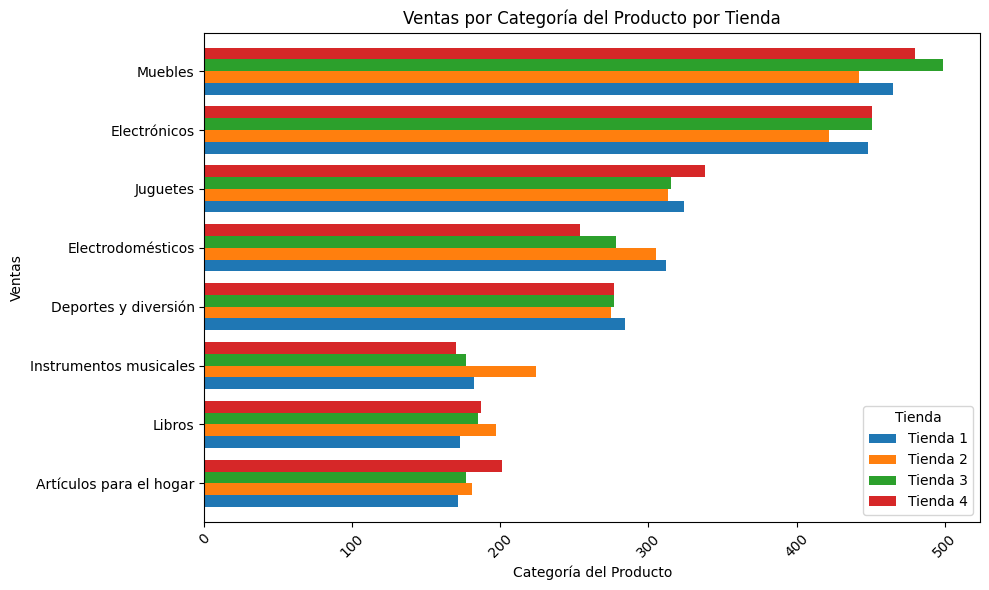

In [8]:
ventas_categoria.plot(kind="barh", width = 0.8 ,figsize=(10, 6))
plt.title("Ventas por Categor√≠a del Producto por Tienda")
plt.xlabel("Categor√≠a del Producto")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [9]:
# Calcular la calificaci√≥n promedio de cada tienda
promedio_calificacion_tienda1 = tienda1['Calificaci√≥n'].mean()
promedio_calificacion_tienda2 = tienda2['Calificaci√≥n'].mean()
promedio_calificacion_tienda3 = tienda3['Calificaci√≥n'].mean()
promedio_calificacion_tienda4 = tienda4['Calificaci√≥n'].mean()

print(f"Calificaci√≥n promedio tienda 1: {promedio_calificacion_tienda1.round(2)}")
print(f"Calificaci√≥n promedio tienda 2: {promedio_calificacion_tienda2.round(2)}")
print(f"Calificaci√≥n promedio tienda 3: {promedio_calificacion_tienda3.round(2)}")
print(f"Calificaci√≥n promedio tienda 4: {promedio_calificacion_tienda4.round(2)}")

Calificaci√≥n promedio tienda 1: 3.98
Calificaci√≥n promedio tienda 2: 4.04
Calificaci√≥n promedio tienda 3: 4.05
Calificaci√≥n promedio tienda 4: 4.0


In [10]:
calificacion_promedio = {
              'Tienda': ['Tienda1', 'Tienda2', 'Tienda3','Tienda4'],
              'Calificaci√≥n Promedio':[tienda1['Calificaci√≥n'].mean(),
                                       tienda2['Calificaci√≥n'].mean(),
                                       tienda3['Calificaci√≥n'].mean(),
                                       tienda4['Calificaci√≥n'].mean()
                                      ]
              }

df_calificacion_promedio = pd.DataFrame(calificacion_promedio)
df_calificacion_promedio

Tienda  Calificaci√≥n Promedio
0  Tienda1                      4
1  Tienda2                      4
2  Tienda3                      4
3  Tienda4                      4

## Gr√°fico

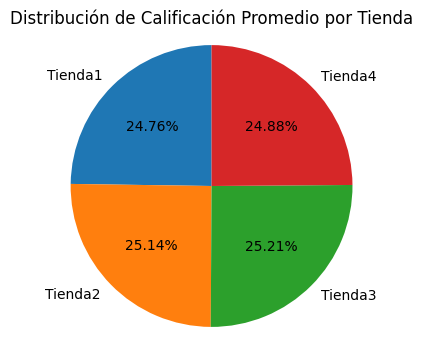

In [11]:
# Datos
labels = calificacion_promedio["Tienda"]
sizes = calificacion_promedio["Calificaci√≥n Promedio"]

# Crear el gr√°fico
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90)
plt.title("Distribuci√≥n de Calificaci√≥n Promedio por Tienda")
plt.axis("equal")  # Para que sea un c√≠rculo perfecto
plt.show()


# 4. Productos m√°s y menos vendidos


Tienda 1 - Productos m√°s vendidos: 
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Precio, dtype: int64

Tienda 1 - Productos menos vendidos: 
Producto
Mochila                      39
Pandereta                    36
Olla de presi√≥n              35
Celular ABXY                 33
Auriculares con micr√≥fono    33
Name: Precio, dtype: int64


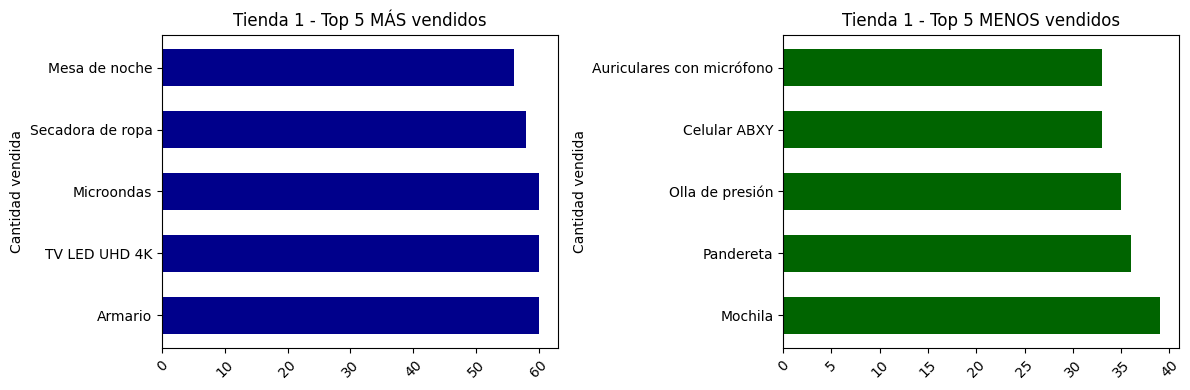


Tienda 2 - Productos m√°s vendidos: 
Producto
Iniciando en programaci√≥n    65
Microondas                   62
Bater√≠a                      61
Pandereta                    58
Guitarra ac√∫stica            58
Name: Precio, dtype: int64

Tienda 2 - Productos menos vendidos: 
Producto
Auriculares        37
Sill√≥n             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Precio, dtype: int64


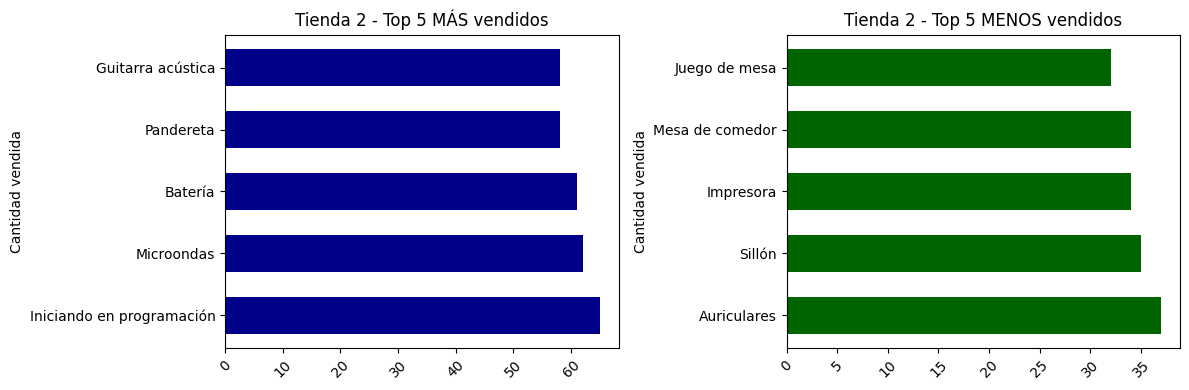


Tienda 3 - Productos m√°s vendidos: 
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Precio, dtype: int64

Tienda 3 - Productos menos vendidos: 
Producto
Guitarra el√©ctrica         38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques de construcci√≥n    35
Name: Precio, dtype: int64


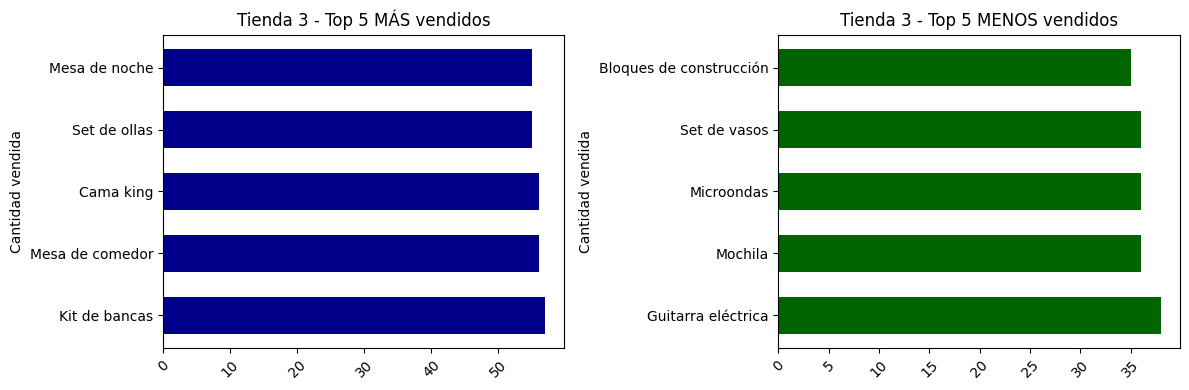


Tienda 4 - Productos m√°s vendidos: 
Producto
Cama box                     62
Cuberter√≠a                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Name: Precio, dtype: int64

Tienda 4 - Productos menos vendidos: 
Producto
Ciencia de datos con Python    38
Refrigerador                   38
Guitarra ac√∫stica              37
Armario                        34
Guitarra el√©ctrica             33
Name: Precio, dtype: int64


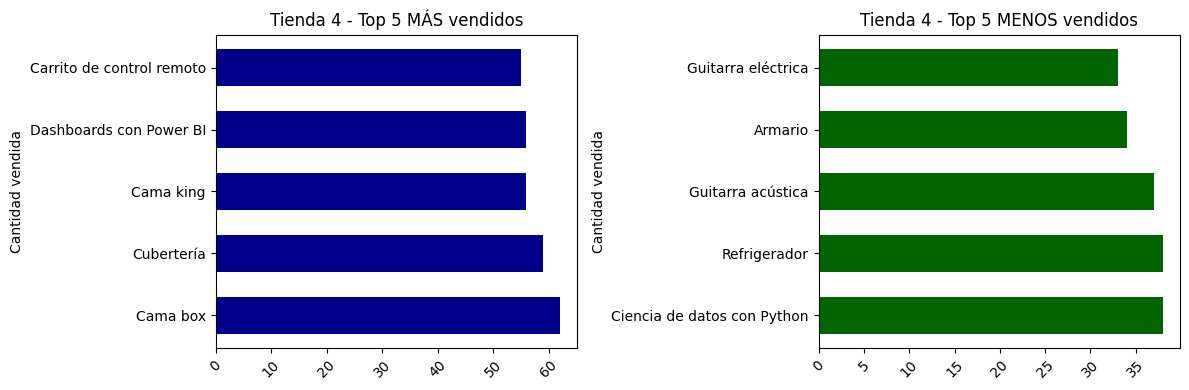

In [41]:
# Funci√≥n para encontrar los productos m√°s y menos vendidos
def productos_mas_menos_vendidos(df, tienda_num):
    ventas_por_producto = df.groupby('Producto')['Precio'].count().sort_values(ascending=False) #ordena de mayor a menos
    mas_vendidos = ventas_por_producto.head(5)
    menos_vendidos = ventas_por_producto.tail(5)
    print(f"\nTienda {tienda_num} - Productos m√°s vendidos: ")
    print(mas_vendidos)
    print(f"\nTienda {tienda_num} - Productos menos vendidos: ")
    print(menos_vendidos)

    # Crear subplots lado a lado
    fig, axs = plt.subplots(1, 2, figsize=(12,4))

    axs[0].barh(mas_vendidos.index, mas_vendidos.values, color="darkblue", height=0.6)
    axs[0].set_title(f"Tienda {tienda_num} - Top 5 M√ÅS vendidos")
    axs[0].set_ylabel("Cantidad vendida")
    axs[0].tick_params(axis='x', rotation=45)

    # Gr√°fico de menos vendidos
    axs[1].barh(menos_vendidos.index, menos_vendidos.values, color="darkgreen", height=0.6)
    axs[1].set_title(f"Tienda {tienda_num} - Top 5 MENOS vendidos")
    axs[1].set_ylabel("Cantidad vendida")
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Llamar a la funci√≥n para cada tienda
productos_mas_menos_vendidos(tienda1, 1)
productos_mas_menos_vendidos(tienda2, 2)
productos_mas_menos_vendidos(tienda3, 3)
productos_mas_menos_vendidos(tienda4, 4)

# 5. Env√≠o promedio por tienda

In [42]:
# Organizo los costos de envio de cada tienda en un DataFrame
costo_envio = {
              'Tienda': ['Tienda1', 'Tienda2', 'Tienda3','Tienda4'],
              'Costo envio':[tienda1['Costo de env√≠o'].mean(),
                             tienda2['Costo de env√≠o'].mean(),
                             tienda3['Costo de env√≠o'].mean(),
                             tienda4['Costo de env√≠o'].mean()
                            ]
              }

df_costo_envio_prom = pd.DataFrame(costo_envio)
df_costo_envio_prom


Tienda  Costo envio
0  Tienda1       26,019
1  Tienda2       25,216
2  Tienda3       24,806
3  Tienda4       23,459

## Gr√°fico

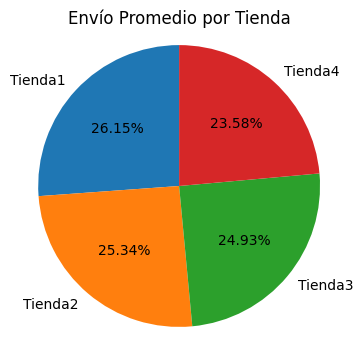

In [38]:
# Datos
labels = df_costo_envio_prom["Tienda"]
sizes = df_costo_envio_prom["Costo envio"]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90)
plt.title("Env√≠o Promedio por Tienda")
plt.axis("equal")  # Para que sea un c√≠rculo perfecto
plt.show()

## INFORME FINAL

## Introducci√≥n


üß≠ **Descripci√≥n del problema**

El Sr. Juan ha solicitado un an√°lisis del rendimiento de cada sucursal con el fin de identificar qu√© tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. El objetivo es identificar la tienda menos eficiente y presentar una recomendaci√≥n final basada en los datos.


üéØ **Objetivos**

El objetivo principal es identificar cu√°l tienda deber√≠a ser vendida, evaluando los siguientes aspectos clave:

- Los ingresos totales de las tiendas üí∞
- Categorias de productos vendidos üõçÔ∏è
- Calificaciones promedio de las tiendas ‚≠ê
- Los productos m√°s y menos vendidos üîù
- Costo de env√≠o promedio por tienda üöö

## üìä Resultados del an√°lisis

## üí∞ Ingresos por tienda
El total de ingresos generados por las cuatro tiendas asciende a $4,403,619,200.00 pesos. La distribuci√≥n es la siguiente:

- Tienda uno   : 26.1% **(mayores ingresos)**
- Tienda dos   : 25.4%
- Tienda tres  : 24.9%
- Tienda cuatro: 23.6% **(menores ingresos)**


En este punto se realiza un an√°lisis considerando la relaci√≥n entre las ventas efectuadas por cada una de las tiendas.

A partir del an√°lisis, se observa la que la tienda 4 presenta un menor desempe√±o en comparaci√≥n a las otras tiendas. Registrandose una diferencia de $112.504.700 un 2.5% menos con la tienda con mayores ganancias.

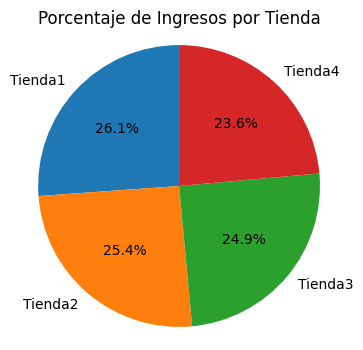

## üõçÔ∏è Categorias de productos vendidos

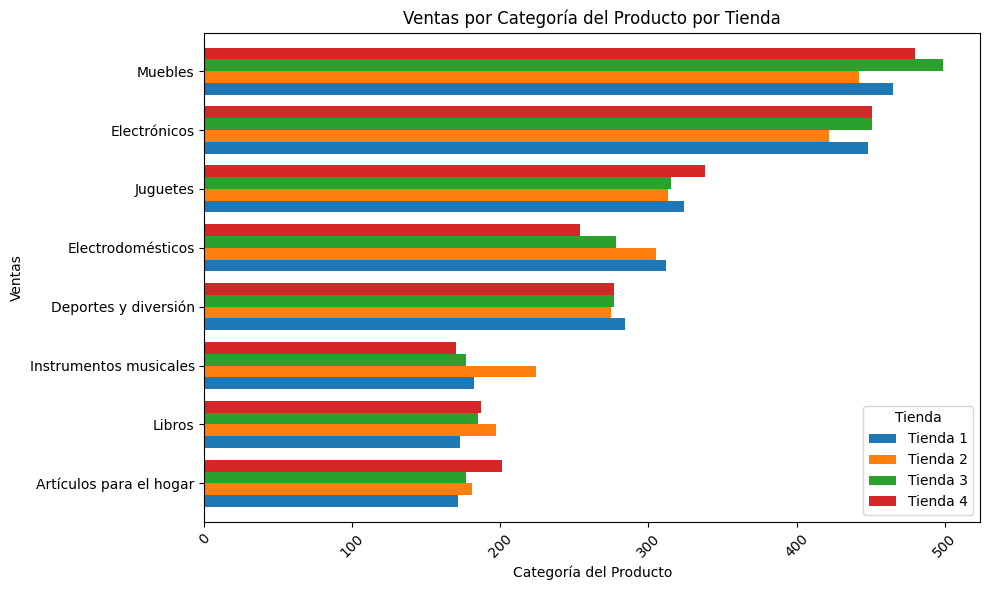

El an√°lisis de las ventas por categor√≠a se realiz√≥ considerando la cantidad de productos vendidos.
A trav√©s de este an√°lisis podemos concluir:

- En todas las tiendas, "Muebles" y "Electr√≥nicos" son consistentemente las categor√≠as m√°s vendidas.
- El item "Juguetes", muestra cierta variabilidad entre tiendas, siendo m√°s alta en la Tienda 4 (338 unidades) y m√°s baja en la Tienda 2 (313 unidades).
- El item "Electrodom√©sticos" y "Deportes y diversi√≥n" presentan fluctuaciones moderadas.
- Esto deja en √∫ltimo lugar los libros, art√≠culos para el hogar y los instrumentos musicales.
- Podemos observar que la Tienda 2 presenta los valores m√°s bajos en las 3 categor√≠as de m√°s alta demanda.

## ‚≠ê Calificaciones de las tiendas

Calificaci√≥n promedio tienda 1: 3.98

Calificaci√≥n promedio tienda 2: 4.04

Calificaci√≥n promedio tienda 3: 4.05

Calificaci√≥n promedio tienda 4: 4.0

- Tienda 2 y Tienda 3 tienen las mejores calificaciones, lo cual puede deberse a una estrategia centrada en mejor atenci√≥n, experiencia o calidad del producto. ‚úÖ
- En el caso de la Tienda 2, aunque vende menos unidades, est√° bien posicionada en calidad y calificaci√≥n promedio.
- Tienda 4 tiene la segunda menor calificaci√≥n y el ingreso por unidad m√°s bajo, lo que puede indicar una satisfacci√≥n mas baja de los clientes.
- Tienda 1 tiene buen volumen e ingresos, pero la menor calificaci√≥n (3.98). Esto puede ser una se√±al que se est√° vendiendo mucho, pero est√° afectando la experiencia del cliente.

##üîù Productos m√°s y menos vendidos

üéØ Objetivo

Analizar el comportamiento de ventas por producto para identificar los art√≠culos con mayor y menor rotaci√≥n en cada tienda, con el fin de tomar decisiones estrat√©gicas sobre inventario, promoci√≥n y cat√°logo.

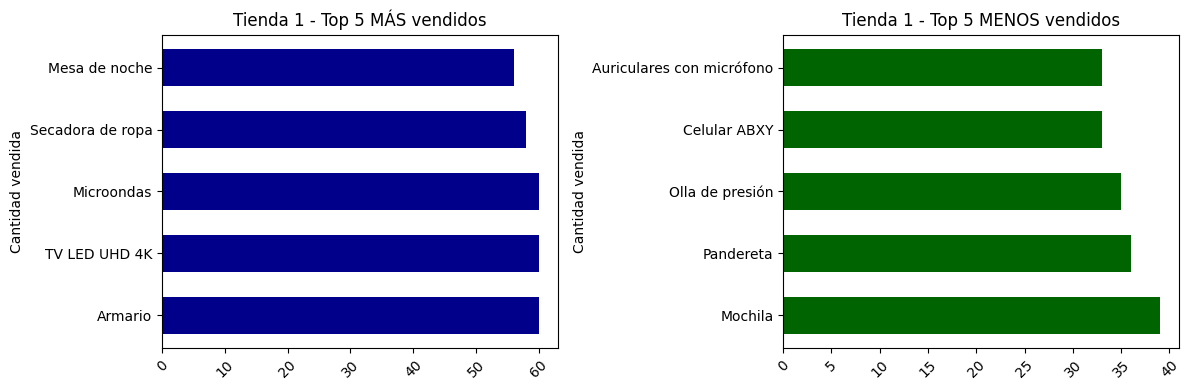

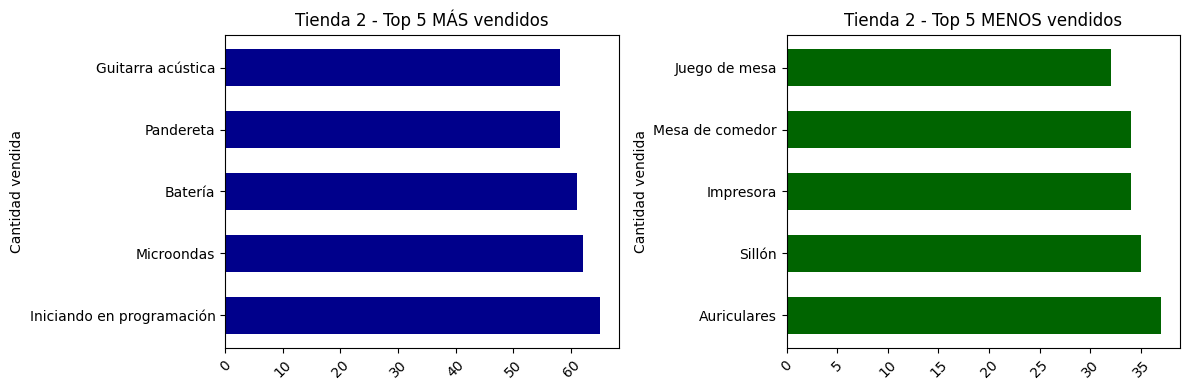

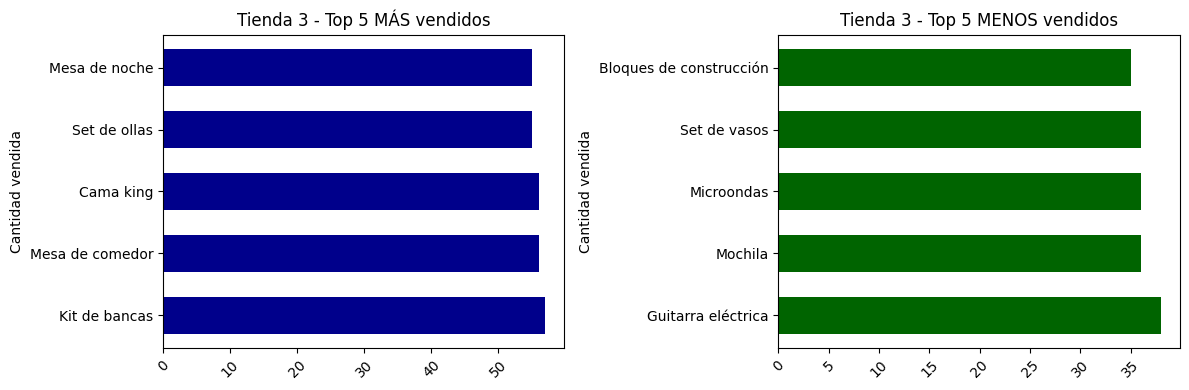

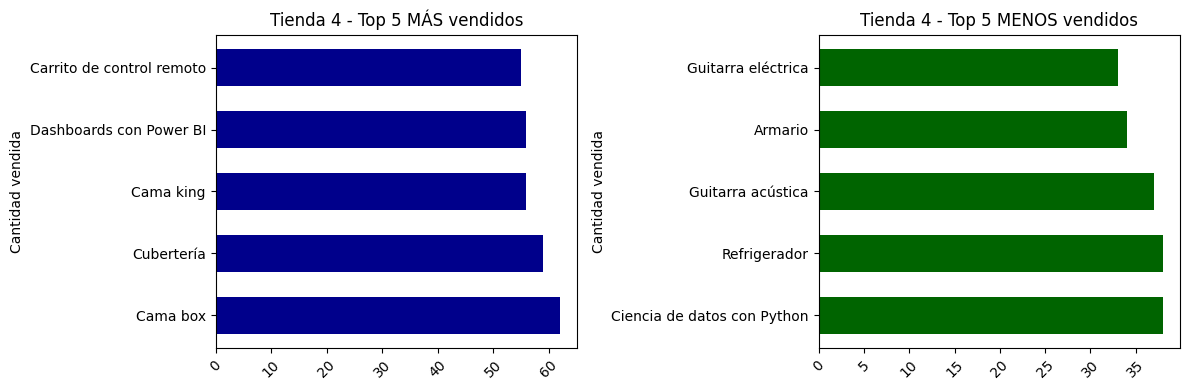

En este punto se realiz√≥ un an√°lisis de los productos m√°s y menos vendidos haciendo un ranking por cada tienda.
Esta informaci√≥n complementa la visi√≥n general de las categor√≠as y permite identificar oportunidades de mejora o productos con bajo rendimiento.

- Como conclusi√≥n podemos indicar que los productos con mayor demanda se puede deber:

 - Necesidad frecuente.
 - Buen posicionamiento en tienda o campa√±as.
 - Excelente relaci√≥n precio-calidad.

- La tienda 4 se puede observar que la categor√≠a "Electr√≥nicos" no figura en el top 5 m√°s vendidos, a diferencia de las otras 3 tiendas.


## üöö Costo de env√≠o promedio por tienda

Se realiz√≥ un an√°lisis del costo promedio de envio en todas las tiendas.
Podemos concluir:

- Se observa que la tienda 1 tiene el mayor costo relacionado con el envio de los productos con un valor de $26.019. Esto puede deberse a que los art√≠culos m√°s vendidos de esta tienda son "Muebles" y "Electr√≥nicos" que pueden ser de mayor tama√±o, lo que puede generar un mayor costo de env√≠o debido a sus dimensiones y peso.

- Tambi√©n podemos obsevar que la tienda 4 tine el menos costo de envio con un costo de $23.459.

# ‚úÖ Conclusiones y Recomendaciones.

El an√°lisis sugiere que la tienda n√∫mero 4 es la mejor opci√≥n para ser vendida, debido a las siguientes razones:

- Es la que menos ingresos genera, es la menos rentable.
- Tiene menos volumen de ventas.
- La satisfacci√≥n de cliente no destaca significativamente frente a las dem√°s.


En resumen, vender la tienda n√∫mero 4 tendr√≠a un impacto controlado en el negocio del Sr. Juan, permiti√©ndole continuar con operaciones eficientes y enfocarse en mejorar las tiendas restantes.
Se recomienda hacer otros an√°lisis m√°s exhaustivos para poder determinar con certeza cual es la tienda que el Sr. Juan debe cerrar.